### Notebook for running SONATA on swiss_roll dataset
Below, we replicate our results for swiss_roll dataset reported in *SONATA: Disambiguated manifold alignment of single-cell data.*




In [1]:
import os.path as osp
import yaml
from easydict import EasyDict

import sonata
from utils.utils import *
from utils.vis import *
import scotv1

In [2]:
# load parameters and datasets
cfg_url='cfgs/swiss_roll.yaml'
with open(cfg_url, 'r',encoding='utf8') as file:
        cfg = EasyDict(yaml.safe_load(file))
basename = osp.basename(osp.dirname(cfg.data_path.dataset_url1))
print("dataset name={}".format(basename))

data1 = load_data(cfg.data_path.dataset_url1)
data2 = load_data(cfg.data_path.dataset_url2)
label1 = load_data(cfg.data_path.label_url1)
label2 = load_data(cfg.data_path.label_url2)
print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


dataset name=swiss_roll
data1 shape=(300, 1000)	data2 shape=(300, 2000)
label1 shape=(300,)	label2 shape=(300,)


### 1. visualize two modalities

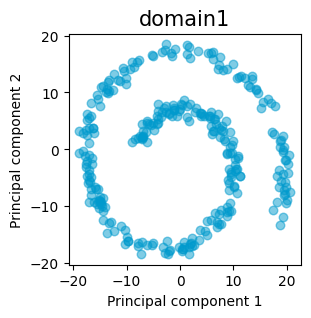

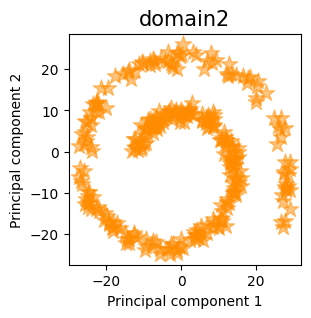

In [5]:
plt_domain(data1, color='#009ACD', title='domain1', show=True)
plt_domain(data2, color='#FF8C00', title='domain2', marker='*', show=True)

### 2. Mapping by SCOT (or any other manifold aligners)

In [ ]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
scot.align(k = cfg.scot.k, e=cfg.scot.e, mode=cfg.scot.mode, metric=cfg.scot.metric, normalize=cfg.scot.normalize)
mapping = scot.coupling
x_aligned, y_aligned = projection_barycentric(scot.X, scot.y, mapping, XontoY = cfg.plt.XontoY)

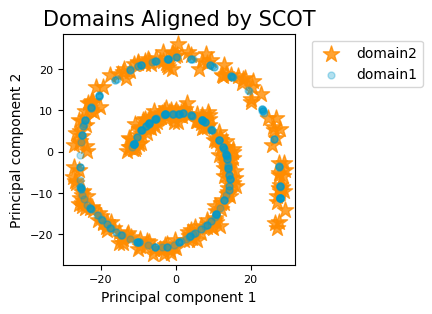

In [7]:
plt_mapping(x_aligned, y_aligned, show=True)

### 3. cell-cell alternaltive mappings from SONATA
SONATA reports that there is no ambiguous on swiss_roll dataset

In [8]:
sn = sonata.sonata(cfg.sonata)
alter_mappings = sn.alt_mapping(data=data1) 

constructing knn graph ...
final k =10
calculating cell-wise ambiguity ...
calculating group-wise ambiguity ...
There is no ambiguous
